In [3]:
import pandas as pd
health_data = pd.read_csv('healthmonitoring.csv')
print(health_data.head())

   PatientID  Age  Gender  HeartRate BloodPressure  RespiratoryRate  \
0          1   69    Male  60.993428        130/85               15   
1          2   32    Male  98.723471        120/80               23   
2          3   78  Female  82.295377        130/85               13   
3          4   38  Female  80.000000        111/78               19   
4          5   41    Male  87.531693        120/80               14   

   BodyTemperature ActivityLevel  OxygenSaturation SleepQuality StressLevel  \
0        98.885236       resting              95.0    excellent         low   
1        98.281883       walking              97.0         good        high   
2        98.820286       resting              98.0         fair        high   
3        98.412594       running              98.0         poor    moderate   
4        99.369871       resting              98.0         good         low   

                    Timestamp  
0  2024-04-26 17:28:55.286711  
1  2024-04-26 17:23:55.286722  
2 

# Dataset contains following columns:
PatientID : Numerical identifier (int)
Age : age of the patient in years (int)
Gender: Gender of the patient 
HeartRate: Heart rate in beats per min
BloodPressure: Blood pressure reading
Respiratory Rate: Respiratory rate in breaths per minute.
BodyTemperature: Body temperature in Fahrenheit.
ActivityLevel: Activity level at the time of the measurement.
OxygenSaturation: Oxygen saturation percentage.
SleepQuality: Quality of sleep reported by the patient.
StressLevel: Reported level of stress.
Timestamp: Date and time of the measurement.


We will monitor the patients' health data, analyze patterns across different patient types, and categorize them based on health standards.

In [4]:
#Checking for null values in data

health_data.isnull().sum()

PatientID             0
Age                   0
Gender                0
HeartRate             0
BloodPressure         0
RespiratoryRate       0
BodyTemperature      18
ActivityLevel         0
OxygenSaturation    163
SleepQuality          0
StressLevel           0
Timestamp             0
dtype: int64

#Body temperature and Oxygen Saturation has null values.
#Lets fill the null values using median (Data transforming)

In [6]:
# Median calculation:
median_bodytemp = health_data['BodyTemperature'].median()
median_O2Saturation = health_data['OxygenSaturation'].median()

#Filling missing values:

health_data['BodyTemperature'].fillna(median_bodytemp, inplace=True)
health_data['OxygenSaturation'].fillna(median_O2Saturation, inplace=True)

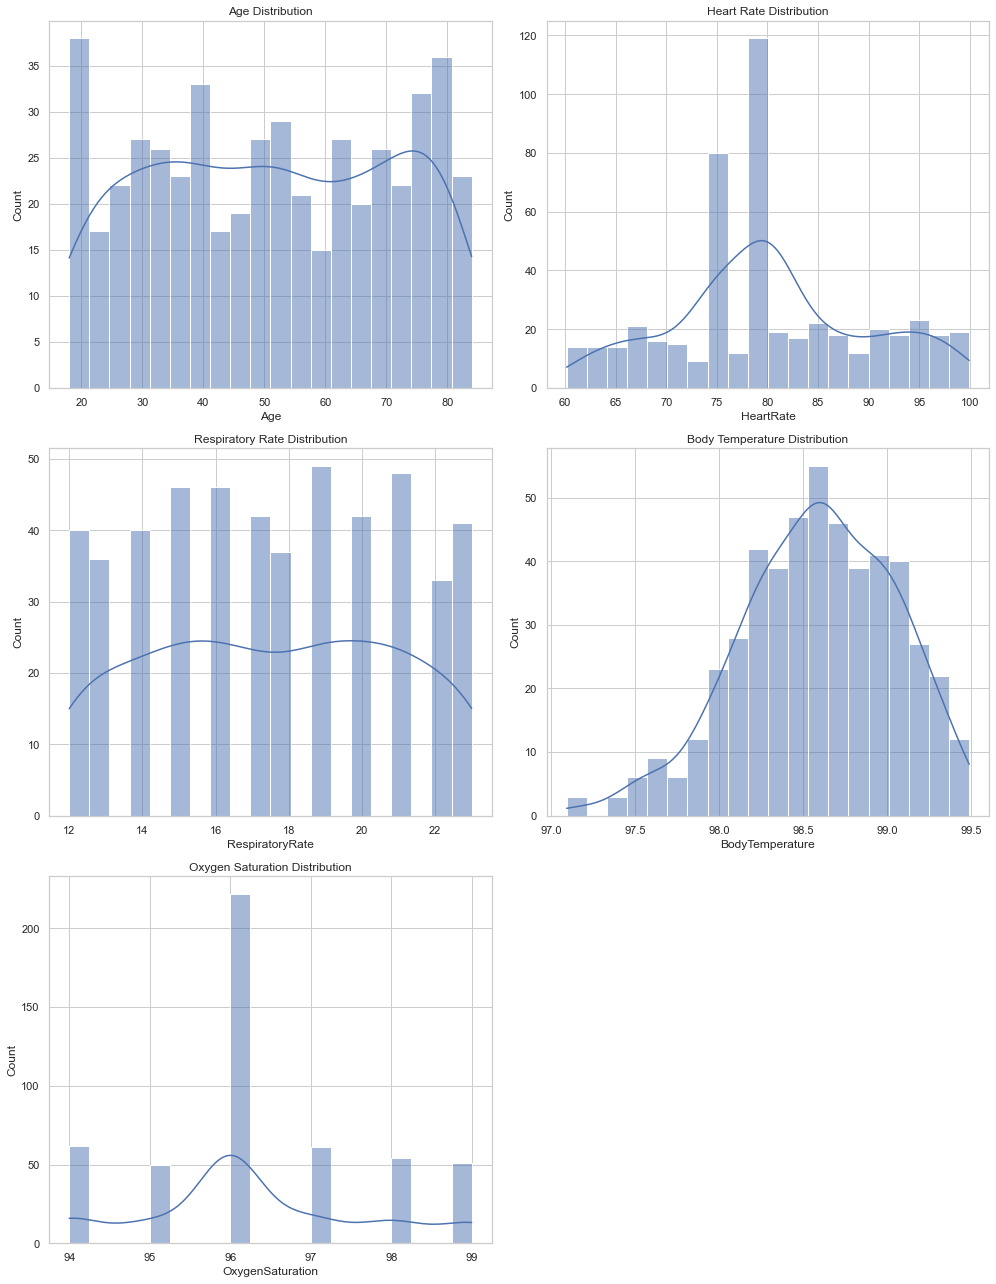

In [7]:
# Summarizing the distribution of the numerical health matrics which will help us to understand the data.

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= "whitegrid")

# Summary statistics
summary_stats = health_data.describe()

# List of numerical features and their titles
features = [
    ('Age', 'Age Distribution'),
    ('HeartRate', 'Heart Rate Distribution'),
    ('RespiratoryRate', 'Respiratory Rate Distribution'),
    ('BodyTemperature', 'Body Temperature Distribution'),
    ('OxygenSaturation', 'Oxygen Saturation Distribution')
]

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 18))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through features and axes
for i, (feature, title) in enumerate(features):
    sns.histplot(health_data[feature], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(title)

# Remove the unused subplot
fig.delaxes(axes[len(features)])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [8]:
print(summary_stats)

        PatientID         Age   HeartRate  RespiratoryRate  BodyTemperature  \
count  500.000000  500.000000  500.000000       500.000000       500.000000   
mean   250.500000   51.146000   80.131613        17.524000        98.584383   
std    144.481833   19.821566    9.606273         3.382352         0.461502   
min      1.000000   18.000000   60.169259        12.000000        97.094895   
25%    125.750000   34.000000   75.000000        15.000000        98.281793   
50%    250.500000   51.000000   80.000000        17.500000        98.609167   
75%    375.250000   69.000000   86.276413        20.000000        98.930497   
max    500.000000   84.000000   99.925508        23.000000        99.489150   

       OxygenSaturation  
count        500.000000  
mean          96.296000  
std            1.408671  
min           94.000000  
25%           96.000000  
50%           96.000000  
75%           97.000000  
max           99.000000  


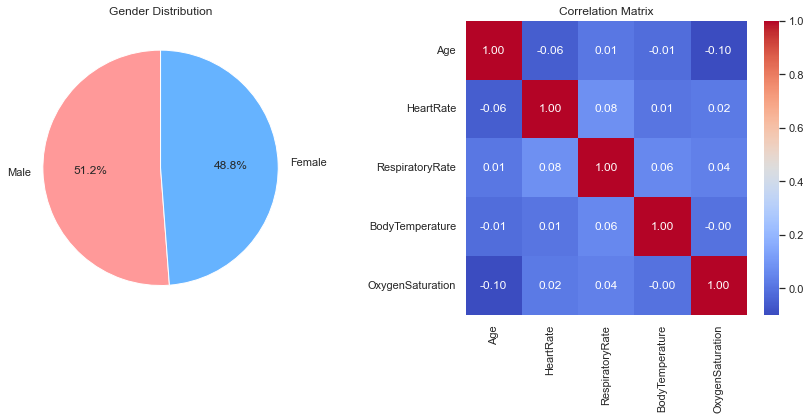

In [9]:
# In the data, lets visualize gender distribution and correlation between the numerical colums:

# Gender distribution
gender_counts = health_data['Gender'].value_counts()

# Correlation b/w the numerical columns:
corr_matrix = health_data[['Age','HeartRate','RespiratoryRate','BodyTemperature','OxygenSaturation']].corr()

# Graphical plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gender distribution plot
gender_counts.plot(kind='pie', ax=axes[0], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
axes[0].set_ylabel('')
axes[0].set_title('Gender Distribution')

# correlation matrix plot
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlation Matrix')

plt.tight_layout()
plt.show()

#Males are slight majority at 51.2% as per the gender distribution.
#The correlation matrix shows no strong correlation between variables as all values are close to zero.
#In this dataset, none of the health metrics—such as Age, Heart Rate, Respiratory Rate, Body Temperature, and Oxygen Saturation—exhibit a strong positive or negative linear relationship with each other. 
#This indicates that, for this group of individuals, variations in one metric do not show a significant correlation with changes in the others.

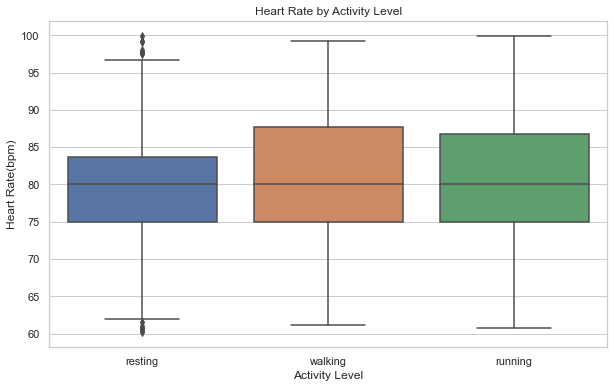

In [12]:
# As we see there is no correlation between the variables, we will have a look at the each variable.
# 1. Heart rate by activity level:

plt.figure(figsize=(10,6))
sns.boxplot(x='ActivityLevel', y= 'HeartRate', data=health_data)
plt.title('Heart Rate by Activity Level')
plt.ylabel('Heart Rate(bpm)')
plt.xlabel('Activity Level')
plt.show()

#Median heart rate increases from resting to walking(which is a physical activity).
#We expect that during running the heart rate should be more than walking however the median does not significantly increase.
#Furthermore, there is notable overlap in the interquartile ranges for heart rates during walking and running, indicating comparable variability in these activities within the sampled population. 
#The outliers observed in the resting category suggest that some individuals have resting heart rates significantly higher than the typical range observed in the rest of the group.

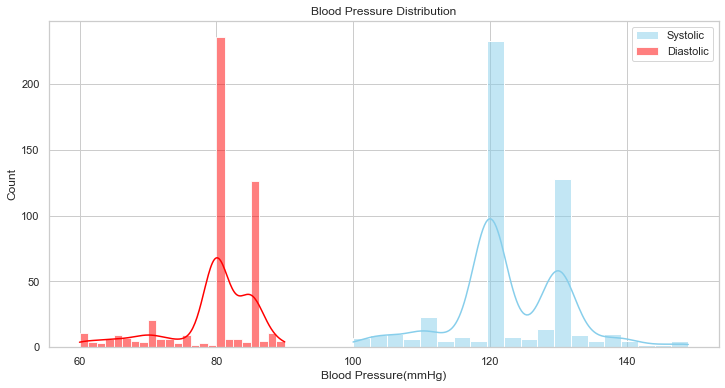

In [14]:
# 2. Distribution of blood pressure level.

# For analysis we are finding systolic and diastolic blood pressure
health_data[['SystolicBP','DiastolicBP']] = health_data['BloodPressure'].str.split('/',expand=True).astype(int)

# Blood Pressure Distribution

plt.figure(figsize=(12, 6))
sns.histplot(health_data['SystolicBP'], color ="skyblue", label="Systolic",kde=True)
sns.histplot(health_data['DiastolicBP'], color ="red", label="Diastolic",kde=True)
plt.title('Blood Pressure Distribution')
plt.xlabel('Blood Pressure(mmHg)')
plt.legend()
plt.show()


#The systolic blood pressure(BP) shows a more spread out distribution with peaks between 120mmHg and 140mmHg.
#The diastolic BP shows narrower distribution with a significant peak around 80mmHg.
#Factors like activity level and stress tends vary the systolic pressure more where 120mmHg/80mmHg (systolic/diastolic) reading is considered normal.

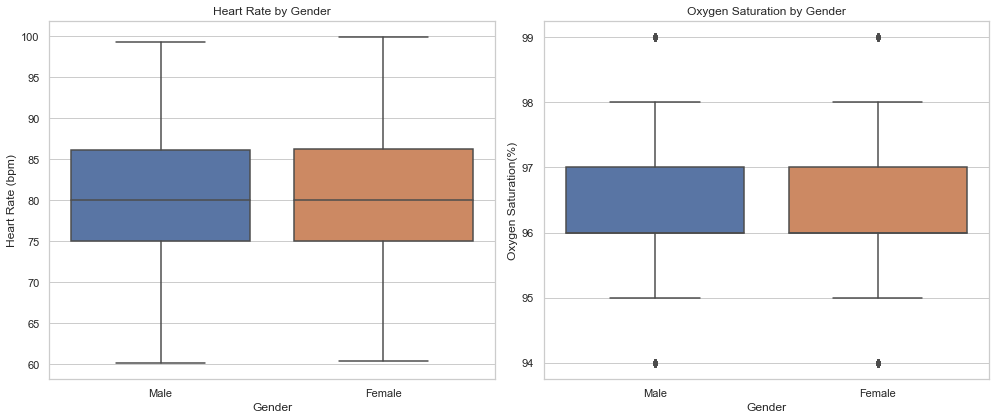

In [17]:
# 3.Health metrics by gender:
fig, axes = plt.subplots(1, 2,figsize=(14,6))
sns.boxplot(x='Gender',y='HeartRate', data=health_data, ax=axes[0])
axes[0].set_title('Heart Rate by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Heart Rate (bpm)')

sns.boxplot(x='Gender',y='OxygenSaturation', data=health_data, ax=axes[1])
axes[1].set_title('Oxygen Saturation by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Oxygen Saturation(%)')

plt.tight_layout()
plt.show()

#In both genders heart rate median values shows similar with a relatively similar interquartile range, indicating no significant difference in heart rate w.r.t gender in this dataset.
#In other hand, Oxygen saturation also shows similar characteristics in both genders.
#Outliers in oxygen saturation for both genders, indicating a few individuals with lower than typical values, but thoes do not seem to affect the overall distribution.

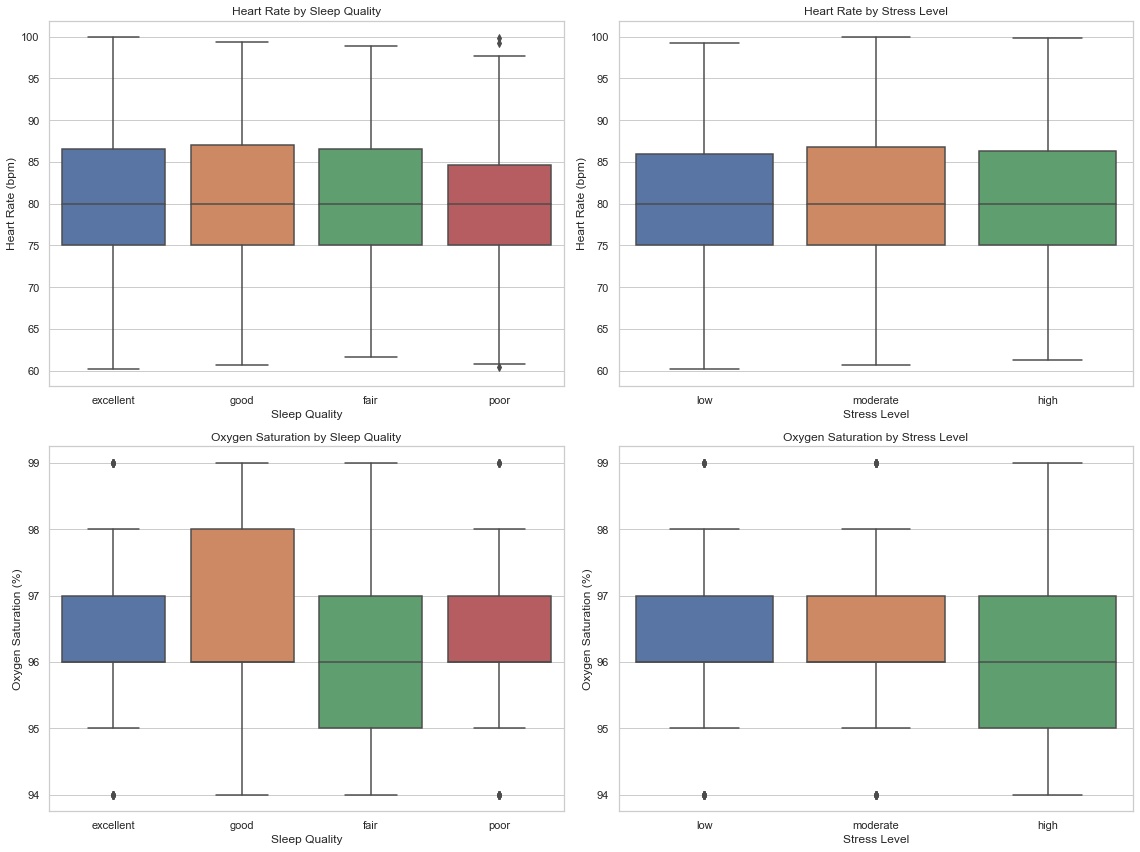

In [23]:
# 4. Analysing Heart rate and Oxygen Saturation by sleep quality and stress levels:

# Categorizing sleep quality & Stress levels
sleep_quality = ['excellent','good','fair','poor']
stress_level = ['low','moderate','high']

# Creating plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Heart rate by Sleep quality
sns.boxplot(x='SleepQuality', y='HeartRate', data=health_data, order=sleep_quality, ax=axes[0,0])
axes[0, 0].set(title='Heart Rate by Sleep Quality', xlabel='Sleep Quality', ylabel='Heart Rate (bpm)')

# Heart rate by Stress Level
sns.boxplot(x='StressLevel', y='HeartRate', data=health_data, order=stress_level, ax=axes[0,1])
axes[0, 1].set(title='Heart Rate by Stress Level', xlabel='Stress Level', ylabel='Heart Rate (bpm)')

# Oxygen Saturation by Sleep Quality
sns.boxplot(x='SleepQuality', y='OxygenSaturation', data=health_data, order=sleep_quality, ax=axes[1,0])
axes[1, 0].set(title='Oxygen Saturation by Sleep Quality', xlabel='Sleep Quality', ylabel='Oxygen Saturation (%)')

# Oxygen Saturation by Stress Level
sns.boxplot(x='StressLevel', y='OxygenSaturation', data=health_data, order=stress_level, ax=axes[1,1])
axes[1, 1].set(title='Oxygen Saturation by Stress Level', xlabel='Stress Level', ylabel='Oxygen Saturation (%)')

plt.tight_layout()
plt.show()


#Heart rate remains fairly stable across various levels of sleep quality and stress, with a small increase in variability observed among individuals reporting poor sleep. 
#Oxygen saturation exhibits only a slight decrease in median values from excellent to poor sleep quality, though some outliers show lower saturation for those with excellent and good sleep. 
#In relation to stress levels, oxygen saturation remains largely consistent. 
#Overall, despite the presence of outliers, the central tendencies indicate that neither heart rate nor oxygen saturation is significantly influenced by sleep quality or stress levels in this dataset.

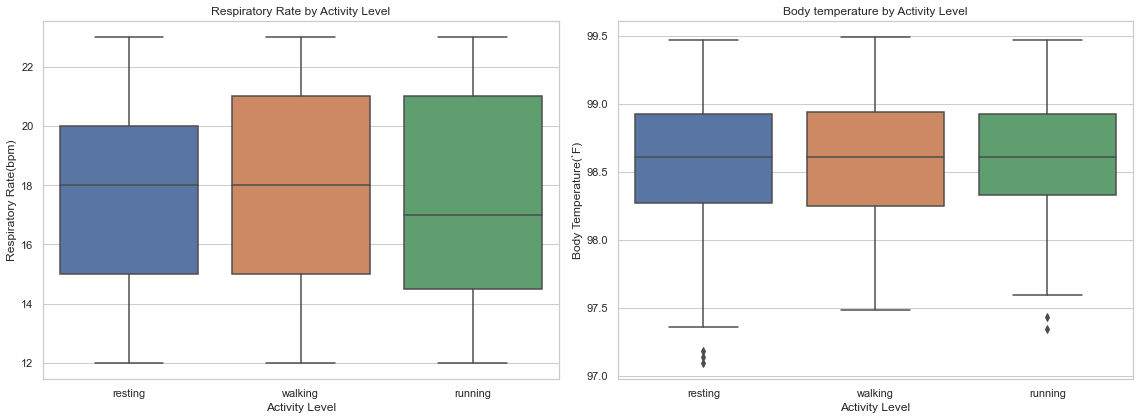

In [32]:
# 5. Analyzing the respiratory rate and body temperature by activity level:

activity_levels = ['resting', 'walking', 'running']

# Plot creation
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Respiratory rate by Activity level
sns.boxplot(x='ActivityLevel',y='RespiratoryRate', data=health_data,order=activity_levels, ax=axes[0])
axes[0].set(title='Respiratory Rate by Activity Level', xlabel='Activity Level', ylabel='Respiratory Rate(bpm)')

# Body temperature by Activity level
sns.boxplot(x='ActivityLevel',y='BodyTemperature', data=health_data, order=activity_levels, ax=axes[1])
axes[1].set(title='Body temperature by Activity Level', xlabel='Activity Level', ylabel='Body Temperature(`F)')
    
plt.tight_layout()
plt.show()

#The respiratory rate generally rises with increased activity level, with higher median rates observed during walking and running compared to resting.
#This trend aligns with the physiological response to exercise, where breathing rates increase to meet the body’s higher oxygen demands.
#For body temperature, there is a slight upward trend from resting to running, reflecting the body's natural increase in temperature during physical exertion.
#Outliers in body temperature at both resting and running levels indicate that some individuals experience temperatures outside the typical range for these activities. 
#Overall, the observed trends are consistent with expected physiological responses to different levels of activity.

# Grouping Patients Based on:
#1.Age Group- Young, Middle-aged, Senior
#2.Blood Pressure Category-  Normal, Elevated, Hypertension Stage 1, Hypertension Stage 2
#3.Heart Rate Category: Low, Normal, High
#4.Oxygen Saturation Category: Normal, Low

In [37]:
# Categorizing Age
def age_group(age):
    if age <= 35:
        return 'Young'
    elif age <= 55:
        return 'Middle-aged'
    else:
        return 'Senior'

# Categorizing Blood Pressure
def bp_category(systolic,diastolic):
    if systolic < 120 and diastolic < 80:
        return 'Normal'
    elif 120 <= systolic < 140 or 80 <= diastolic < 90:
        return 'Elevated'
    elif 140 <= systolic < 160 or 90 <= diastolic < 100:
        return 'Hypertension Stage 1'
    else:
        return 'Hypertension Stage 2'
    
# Categorizing Heart Rate
def hr_category(hr):
    if hr < 60:
        return 'Low'
    elif hr <= 100:
        return 'Normal'
    else:
        return 'High'

# Categorizing Oxygen Saturation
def oxy_cat(oxy):
    if oxy < 94:
        return'Low'
    else:
        return 'Normal'

# Applyting Categories:
health_data['AgeGroup']=health_data['Age'].apply(age_group)
health_data['BPCategory']=health_data.apply(lambda x: bp_category(x['SystolicBP'], x['DiastolicBP']), axis=1)
health_data['HRCategory']=health_data['HeartRate'].apply(hr_category)
health_data['OxyCategory']=health_data['OxygenSaturation'].apply(oxy_cat)

print(health_data[['Age', 'AgeGroup', 'SystolicBP', 'DiastolicBP', 'BPCategory', 'HeartRate', 'HRCategory', 'OxygenSaturation', 'OxyCategory']].head())

   Age     AgeGroup  SystolicBP  DiastolicBP BPCategory  HeartRate HRCategory  \
0   69       Senior         130           85   Elevated  60.993428     Normal   
1   32        Young         120           80   Elevated  98.723471     Normal   
2   78       Senior         130           85   Elevated  82.295377     Normal   
3   38  Middle-aged         111           78     Normal  80.000000     Normal   
4   41  Middle-aged         120           80   Elevated  87.531693     Normal   

   OxygenSaturation OxyCategory  
0              95.0      Normal  
1              97.0      Normal  
2              98.0      Normal  
3              98.0      Normal  
4              98.0      Normal  


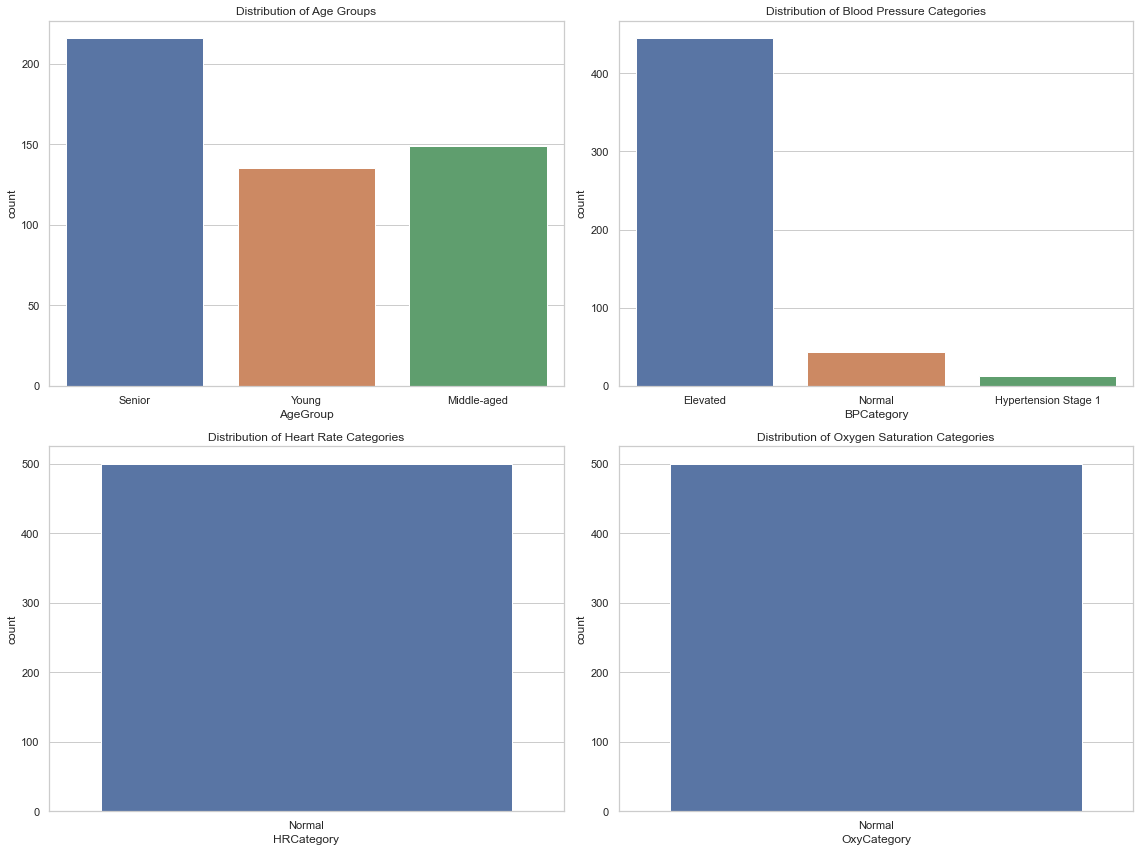

In [38]:
# Plotting

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Age Group
sns.countplot(x='AgeGroup', data=health_data, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age Groups')

# Blood Pressure Categories
sns.countplot(x='BPCategory', data=health_data, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Blood Pressure Categories')

# Heart Rate categories
sns.countplot(x='HRCategory', data=health_data, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Heart Rate Categories')

# Oxygen Saturation categories
sns.countplot(x='OxyCategory', data=health_data, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Oxygen Saturation Categories')

# Show the plots
plt.tight_layout()
plt.show()

# Graph Observations:
#1.Age Group Distribution: The count plot reveals that the ‘Senior’ category has the highest number of individuals, followed by ‘Young’ and ‘Middle-aged’ categories. This indicates that seniors are the predominant age group in this dataset.
#2.Blood Pressure Category Distribution: Most participants have ‘Normal’ blood pressure, with fewer individuals classified as ‘Elevated’ or ‘Hypertension Stage 1’. ‘Hypertension Stage 2’ is the least common category, suggesting that severe hypertension is relatively rare among the participants.
#3.Heart Rate Category Distribution: The majority of individuals have a ‘Normal’ heart rate, with only a few classified as ‘Low’ or ‘High’. This indicates that most participants have heart rates within the expected range.
#4.Oxygen Saturation Category Distribution: Nearly all participants have ‘Normal’ oxygen saturation levels, with very few experiencing ‘Low’ saturation. This suggests that oxygen deprivation is not a prevalent issue within this group.

# Summary
#Health Monitoring and Analysis encompasses a variety of activities, from real-time physiological data collection—such as heart rate, blood pressure, and temperature—to the analysis of more detailed health records, including patient history, lifestyle choices, and genetic information.